## Load Data from CSVs

In [1]:
#####################################
#                 1                 #
#####################################

## Read in the data from enrollments.csv, daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

import os, sys
import unicodecsv

# function for reading a csv file
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

# load enrollments file
enroll = os.path.join(os.getcwd(),"datasets\enrollments.csv")
print '\n',enroll 
    
enrollments = read_csv(enroll)    # read data

print '\n',len(enrollments), 'number of rows read from file' # number of rows
print enrollments[1] # print first row


# load daily engagements file #
engagement = os.path.join(os.getcwd(),"datasets\daily_engagement.csv")
print '\n',engagement

daily_engagement = read_csv(engagement)

print '\n',len(daily_engagement), 'number of rows read from file' # number of rows
print daily_engagement[1] # print first row


# load project submissions file #
submission = os.path.join(os.getcwd(),"datasets\project_submissions.csv")
print '\n',submission

project_submissions = read_csv(submission)

print '\n',len(project_submissions), 'number of rows read from file' # number of rows
print project_submissions[1] # print first row


D:\Users\dbalagere\Documents\PythonScripts\data_analysis\datasets\enrollments.csv

1640 number of rows read from file
{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-05', u'account_key': u'448', u'cancel_date': u'2014-11-10', u'days_to_cancel': u'5'}

D:\Users\dbalagere\Documents\PythonScripts\data_analysis\datasets\daily_engagement.csv

136240 number of rows read from file
{u'lessons_completed': u'0.0', u'num_courses_visited': u'2.0', u'total_minutes_visited': u'37.2848873333', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-10'}

D:\Users\dbalagere\Documents\PythonScripts\data_analysis\datasets\project_submissions.csv

3642 number of rows read from file
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'INCOMPLETE', u'completion_date': u'2015-01-13', u'creation_date': u'2015-01-10'}


## Fixing Data Types

In [2]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [3]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [4]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [5]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

print len(enrollments), 'number of enrollments'

unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
print len(unique_enrolled_students), 'unique number of student enrollments'

print len(daily_engagement), ' number of daily engagements'

unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['acct'])
print len(unique_engagement_students), 'unique number of student engagements'

print len(project_submissions), 'number of submissions'

unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
print len(unique_project_submitters),'unique number of project submissions'

1640 number of enrollments
1302 unique number of student enrollments
136240  number of daily engagements
1237 unique number of student engagements
3642 number of submissions
743 unique number of project submissions


## Problems in the Data

In [6]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

# check if renaming and the delete worked
daily_engagement[0]['account_key']

u'0'

## Missing Engagement Records

In [7]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [8]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
missing = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']):
        missing = missing+1
        print enrollment

print missing

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [9]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [10]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [11]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [12]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
print 'Number of Students :', len(paid_students)
paid_students.viewitems()
paid_students['1200']

Number of Students : 995


datetime.datetime(2015, 3, 4, 0, 0)

## Getting Data from First Week

In [13]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

## Remove Free trial cancels from the data

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [14]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [60]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

In [61]:
paid_engagement_in_first_week[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

## Exploring Student Engagement

In [62]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
engagement_by_account['0'][:3] # check the firsy key and just first 3 (of the 7) values for the key

[{'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 11.6793745,
  u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 37.2848873333,
  u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)},
 {'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 53.6337463333,
  u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}]

In [63]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [64]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [49]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

# lets start by looking into the time spent per week by each student and find the account with max time

max(total_minutes_by_account.items(), key=lambda pair: pair[1]) # this will index for 1 since that is where the time is stored

(u'108', 10568.100867332541)

In [51]:
# Now lets pull info about account key 108

engagement_by_account['108']
print len(engagement_by_account['108'])

110


In [52]:
# we see that this student has 110 entires, but we should have exact 7 entires for every student since this is 
# data from just first week of class
## we need to go back and change the within_one_week to include 'time_delta.days >= 0' condition 

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

## Lessons Completed in First Week

In [65]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# Sum over function
def sum_over(variable_, dict_):
    sum_data = {}
    for account_key, engagement_for_student in dict_.items():
        total_ = 0
        for engagement_record in engagement_for_student:
            total_ += engagement_record[variable_]
        sum_data[account_key] = total_
    return sum_data

# Summarize function
def summarize(dict_):
    total_ = dict_.values()
    print 'Mean:', np.mean(total_)
    print 'Standard deviation:', np.std(total_)
    print 'Minimum:', np.min(total_)
    print 'Maximum:', np.max(total_)

# summary for lessons_completed   
total_lessons_completed = sum_over('lessons_completed',engagement_by_account)
summarize(total_lessons_completed)

# summary for num_courses_visited  
total_num_courses_visited = sum_over('num_courses_visited',engagement_by_account)
summarize(total_num_courses_visited)


Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36
Mean: 3.97889447236
Standard deviation: 3.5912451871
Minimum: 0
Maximum: 25


## Number of Visits in First Week

In [66]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
        
print paid_engagement[0] # check

## now re-create the "engagement_by_account" data

from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

# check to see if the 'has-visited' field been created
engagement_by_account['0'][:2]

{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


[{'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 11.6793745,
  u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 37.2848873333,
  u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}]

In [67]:
# Now summarize data
# summary for num_courses_visited   
total_courses_visited = sum_over('has_visited',engagement_by_account)
summarize(total_courses_visited)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [85]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_grade = ['PASSED','DISTINCTION']

###

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and (rating in pass_grade)):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record) # add to pass list
    else:
        non_passing_engagement.append(engagement_record) # add to non-pass list

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [92]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

### First get all the engagement data for each key
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')


In [98]:
print 'non-passing students: total_minutes_visited'

# call the sum_over & summarize functions that we have defined earlier

non_passing_minutes = sum_over('total_minutes_visited',non_passing_engagement_by_account)
summarize(non_passing_minutes)


print '\n','passing students: total_minutes_visited'

# call the sum_over & summarize functions that we have defined earlier

passing_minutes = sum_over('total_minutes_visited',passing_engagement_by_account)
summarize(passing_minutes)

non-passing students: total_minutes_visited
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933

passing students: total_minutes_visited
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


## Making Histograms

In [108]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.



#### The line %matplotlib inline is specifically for IPython notebook, and causes your plots to appear in your notebook rather than a new window. If you are not using IPython notebook, you should not include this line, and instead you should add the line plt.show() at the bottom to show the plot in a new window.

#### sample histogram code


data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(data)

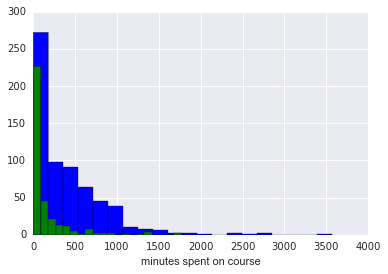

In [120]:
### Histograms ###

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(passing_minutes.values(),bins=20,color='blue')
plt.hist(non_passing_minutes.values(),bins=20,color='green')
plt.xlabel('minutes spent on course')

## Improving Plots and Sharing Findings

In [119]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

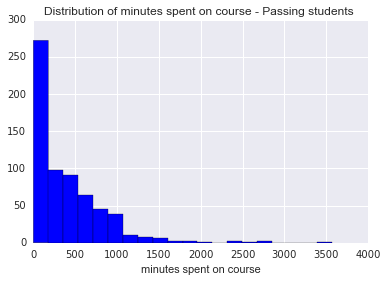

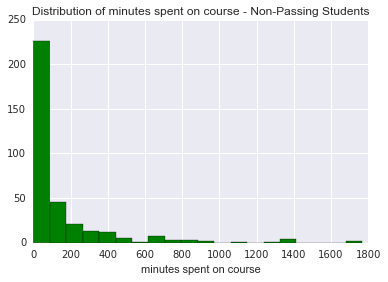

In [129]:
plt.hist(passing_minutes.values(),bins=20,color='blue')
plt.xlabel('minutes spent on course')
plt.title('Distribution of minutes spent on course - Passing students ')
plt.show()
# Adding plt.show() after each plot will cause the two plots in this cell to display separately,
# rather than on top of each other

plt.hist(non_passing_minutes.values(),bins=20,color='green')
plt.xlabel('minutes spent on course')
plt.title('Distribution of minutes spent on course - Non-Passing Students')
plt.show()